#### **For some actions, you may want to require human approval before running to ensure that everything is running as intended.**

In [1]:

from typing import Annotated
import operator,json
from typing import TypedDict, Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph,END,START
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [3]:
llm.invoke("hi")

AIMessage(content='Hi! 👋 What can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 3.7e-07, 'queue_time': 0.024033985, 'total_time': 0.025454915}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-de407438-c42d-4aea-9986-71c5712cd860-0', usage_metadata={'input_tokens': 10, 'output_tokens': 14, 'total_tokens': 24})

In [4]:
llm.invoke("hi").content

'Hi! 👋 How can I help you today? 😊\n'

In [5]:
@tool
def multiply(first_number:int, second_number:int)->int:
    """multiply two integer number"""
    return first_number * second_number

In [6]:
multiply({"first_number":24,"second_number":364})

C:\Users\SURESH BEEKHANI\AppData\Local\Temp\ipykernel_9536\2089873997.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multiply({"first_number":24,"second_number":364})


8736

In [7]:
multiply.invoke({"first_number":24,"second_number":364})

8736

In [8]:
@tool
def search(query:str):
    """perform the web search on the user query"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return result

In [9]:
search("who is a current president of USA?")

[{'url': 'https://www.usa.gov/presidents',
  'content': 'Presidents, vice presidents, and first ladies | USAGov An official website of the United States government A .gov website belongs to an official government organization in the United States. Learn about the duties of president, vice president, and first lady of the United States. President of the United States The president of the United States is the: Former U.S. presidents The United States has had 46 former U.S. presidents. Vice president of the United States The vice president of the United States presides over the U.S. Senate and takes over the role of president of the United States if the president is unable to perform their duties. The 50th and current vice president of the United States is James David (JD) Vance.'},
 {'url': 'https://www.whitehouse.gov/administration/',
  'content': 'The Trump Administration Search Search for:  Press Enter to Search Trump 45th & 47th President of the United States After a landslide electi

In [10]:
search.invoke("who is a current president of Pakistan?")

[{'url': 'https://www.local.com.pk/government/offices/president/',
  'content': 'Asif Ali Zardari became 14th President of Pakistan on 10 March 2024. He earlier served as the 11th president of Pakistan from 2008 to 2013.'},
 {'url': 'https://mofa.gov.pk/president-of-pakistan',
  'content': 'Asif Ali Zardari is the 14th President of Pakistan. He took the oath of the office on 10 March 2024. Previously, he served as the 11th President of Pakistan'},
 {'url': 'https://pakun.org/president-of-pakistan',
  'content': 'Following the successful presidential election, Mr Zardari has been elected as the 14th President of Pakistan. He took the oath of the office of the President'},
 {'url': 'https://pakistan.gov.pk/',
  'content': 'Government of Pakistan Federal Government Federal Ministers National Assembly of Pakistan Ministries & Divisions Supreme Court of Pakistan High Court of Sindh High Court of Balochistan About Pakistan The President of Pakistan President Mr Asif Ali Zardari is the 14th P

In [11]:
tools=[search,multiply]

In [12]:
model_with_tools = llm.bind_tools(tools)

In [13]:
tool_mapping={tool.name: tool for tool in tools}

In [14]:
tool_mapping

{'search': StructuredTool(name='search', description='perform the web search on the user query', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000002460AA312D0>),
 'multiply': StructuredTool(name='multiply', description='multiply two integer number', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000002460AA30F70>)}

In [34]:
response = model_with_tools.invoke("who is a current president of CM Of sindh?")

In [35]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_gry4', 'function': {'arguments': '{"query":"who is the current president of CM Of sindh?"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 1079, 'total_tokens': 1168, 'completion_time': 0.161818182, 'prompt_time': 0.044573159, 'queue_time': 0.024667435, 'total_time': 0.206391341}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-41842999-a114-4999-9c21-0b20475bc93f-0', tool_calls=[{'name': 'search', 'args': {'query': 'who is the current president of CM Of sindh?'}, 'id': 'call_gry4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1079, 'output_tokens': 89, 'total_tokens': 1168})

In [36]:
tool_details=response.additional_kwargs.get("tool_calls")

In [37]:
tool_details

[{'id': 'call_gry4',
  'function': {'arguments': '{"query":"who is the current president of CM Of sindh?"}',
   'name': 'search'},
  'type': 'function'}]

In [38]:
tool_details[0]["function"]["name"]

'search'

In [39]:
tool_details[0]["function"]["arguments"]

'{"query":"who is the current president of CM Of sindh?"}'

In [40]:
json.loads(tool_details[0]["function"]["arguments"])

{'query': 'who is the current president of CM Of sindh?'}

In [41]:
tool_mapping[tool_details[0]["function"]["name"]].invoke(json.loads(tool_details[0]["function"]["arguments"]))

[{'url': 'https://en.wikipedia.org/wiki/Chief_Minister_of_Sindh',
  'content': 'Syed Murad Ali Shah is the current Chief Minister of Sindh, serving since 26 February 2024. The chief minister is the head of the provincial government.'},
 {'url': 'https://sindhinvestment.gos.pk/cm-message',
  'content': 'President Zardari also laid the foundation stone of the Jhirk-Mulla Katiar Bridge project which is completed in 2017, it links important cities of lower Sindh,'},
 {'url': 'https://www.facebook.com/SindhCMHouse/videos/karachi-january-6th-2025-chief-minister-of-sindh-syed-murad-ali-shah-along-with-/1296859604968649/',
  'content': 'KARACHI (January 6th, 2025): Chief Minister of Sindh, Syed Murad Ali Shah, along with Madam Faryal Talpur, former chief minister Syed Qaim'},
 {'url': 'https://en.wikipedia.org/wiki/Murad_Ali_Shah',
  'content': 'Syed Murad Ali Shah is a Pakistani politician and structural engineer who is currently serving as the Chief Minister of Sindh province of Pakistan and

In [42]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [43]:
def invoke_model(state:AgentState):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [44]:
def invoke_tool(state:AgentState):
    tool_details= state['messages'][-1].additional_kwargs.get("tool_calls", [])[0]
    
    if tool_details is None:
        raise Exception("no tool call found")
    
    print(f'Selected tool: {tool_details.get("function").get("name")}')
    
    if tool_details.get("function").get("name")=="search":
        response = input(prompt=f"[y/n] continue with expensive web search?")
        if response == "n":
            raise Exception("web search discard")
        
    response = tool_mapping[tool_details['function']['name']].invoke(json.loads(tool_details.get("function").get("arguments")))
    return {"messages" : [response]}

In [45]:
def router(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "tool"
    else:
        return "end"

In [46]:
graph = StateGraph(AgentState) ### StateGraph with AgentState

graph.add_node("ai_assistant", invoke_model)

graph.add_node("tool", invoke_tool)

In [47]:
graph.add_conditional_edges("ai_assistant", router, {"tool": "tool","end": END,})

graph.add_edge("tool", END)

#graph.add_edge("tool", "ai_assistant")

graph.set_entry_point("ai_assistant")

In [48]:
app = graph.compile()

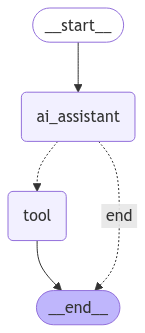

In [49]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [51]:
for s in app.stream({"messages": ["who is  MPA of  umerkot?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cfe3', 'function': {'arguments': '{"query":"Who is MPA of Umerkot?"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 1077, 'total_tokens': 1163, 'completion_time': 0.156363636, 'prompt_time': 0.043924606, 'queue_time': 0.023393909999999997, 'total_time': 0.200288242}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-944498a4-895f-424c-a36e-b0b05da9e884-0', tool_calls=[{'name': 'search', 'args': {'query': 'Who is MPA of Umerkot?'}, 'id': 'call_cfe3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1077, 'output_tokens': 86, 'total_tokens': 1163})]}
----
Selected tool: search
{'messages': [[{'url': 'https://www.pakinformation.com/mna-mpa/election2018/umerkot.html', 'content': 'MPA of Umerkot District General Election 2018 ... Syed Sardar Ali Shah , Ta

In [52]:
for s in app.stream({"messages": ["what is multiplication of 23 and 46?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_z702', 'function': {'arguments': '{"first_number":23,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 1080, 'total_tokens': 1173, 'completion_time': 0.169090909, 'prompt_time': 0.05998929, 'queue_time': 0.023610933, 'total_time': 0.229080199}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f4e5ad6c-7e09-46b2-89fa-bb590a2dd916-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 23, 'second_number': 46}, 'id': 'call_z702', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1080, 'output_tokens': 93, 'total_tokens': 1173})]}
----
Selected tool: multiply
{'messages': [1058]}
----


In [53]:
for s in app.stream({"messages": ["what is the total amount of money exist over the earth?"]}):
    print(list(s.values())[0])
    print("----")

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6nkz', 'function': {'arguments': '{"query":"total amount of money exist over the earth"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1080, 'total_tokens': 1167, 'completion_time': 0.158181818, 'prompt_time': 0.044051584, 'queue_time': 0.024524529999999996, 'total_time': 0.202233402}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-753619b0-5827-44a2-b087-1e746be753d6-0', tool_calls=[{'name': 'search', 'args': {'query': 'total amount of money exist over the earth'}, 'id': 'call_6nkz', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1080, 'output_tokens': 87, 'total_tokens': 1167})]}
----
Selected tool: search
{'messages': [[{'url': 'https://www.quora.com/How-much-money-is-in-the-world', 'content': 'The total amount of money in the world, often r

#### **LangGraph supports human-in-the-loop workflows in a number of ways. In this section, we will use LangGraph's interrupt_before functionality to always break the tool node.**

In [54]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [ ]:
class AgentState(TypedDict):
    messages: Annotated[list, add_messages]

In [55]:
tavily=TavilySearchResults()

In [56]:
tools = [tavily]

In [57]:
llm_with_tools = llm.bind_tools(tools)

In [58]:
def ai_assistant(state: AgentState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [59]:
memory = MemorySaver()

In [60]:
graph_builder = StateGraph(AgentState)
graph_builder.add_node("ai_assistant", ai_assistant)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

In [61]:
graph_builder.add_edge(START, "ai_assistant")

graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)
graph_builder.add_edge("tools", "ai_assistant")

In [62]:
app2 = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ tools, if desired.
    # interrupt_after=["tools"]
)

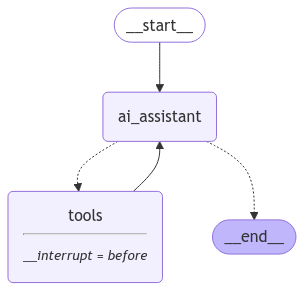

In [63]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [64]:
user_input = "what is current a capital of umerkot?"
config = {"configurable": {"thread_id": "1"}}

In [65]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [67]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_8s8f)
 Call ID: call_8s8f
  Args:
    query: capital of umerkot


In [68]:
snapshot = app2.get_state(config)

In [69]:
snapshot.next

('tools',)

In [70]:
last_message=snapshot.values["messages"][-1]

In [71]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'capital of umerkot'},
  'id': 'call_8s8f',
  'type': 'tool_call'}]

In [72]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [73]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_8s8f)
 Call ID: call_8s8f
  Args:
    query: capital of umerkot
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.youtube.com/watch?v=ONb1c2BfxfE", "content": "Umerkot District also known as Amarkot District, is a district in the Sindh province of Pakistan. The city of Umerkot is the capital of the"}, {"url": "https://www.rspn.org/wp-content/uploads/2013/12/tahafuz-cause-study-kaplor.pdf", "content": "Umerkot is one of the oldest cities of Sindh and has much to offer in terms of history, culture and glory. It was once the capital of Greater Sindh Province"}, {"url": "https://reliefweb.int/report/pakistan/pakistan-emergency-situational-analysis-district-umerkot-june-2014", "content": "Formerly known as Amarkot, it was the capital of Greater Sindh Province, including some part

In [74]:
user_input = "what is a weather there?"

config = {"configurable": {"thread_id": "1"}}

In [75]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [77]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_r3ay)
 Call ID: call_r3ay
  Args:
    query: weather in Umerkot Pakistan


In [79]:
snapshot = app2.get_state(config)

In [80]:
snapshot.next

('tools',)

In [81]:
last_message=snapshot.values["messages"][-1]

In [82]:
last_message.tool_calls

[{'name': 'tavily_search_results_json',
  'args': {'query': 'weather in Umerkot Pakistan'},
  'id': 'call_r3ay',
  'type': 'tool_call'}]

In [83]:
# `None` will append nothing new to the current state, letting it resume as if it had never been interrupted
events = app2.stream(None, config, stream_mode="values")

In [84]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_r3ay)
 Call ID: call_r3ay
  Args:
    query: weather in Umerkot Pakistan
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Umerkot', 'region': 'Punjab', 'country': 'Pakistan', 'lat': 28.4931, 'lon': 70.0972, 'tz_id': 'Asia/Karachi', 'localtime_epoch': 1739163150, 'localtime': '2025-02-10 09:52'}, 'current': {'last_updated_epoch': 1739162700, 'last_updated': '2025-02-10 09:45', 'temp_c': 22.1, 'temp_f': 71.8, 'is_day': 1, 'condition': {'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}, 'wind_mph': 3.4, 'wind_kph': 5.4, 'wind_degree': 94, 'wind_dir': 'E', 'pressure_mb': 1015.0, 'pressure_in': 29.98, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 11, 'cloud': 12, 'feelslike_c': 22.1, 'f

In [85]:
app2.get_state(config)

StateSnapshot(values={'messages': [['user', 'what is current a capital of umerkot?'], AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_8s8f', 'function': {'arguments': '{"query":"capital of umerkot"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 991, 'total_tokens': 1082, 'completion_time': 0.165454545, 'prompt_time': 0.031870229, 'queue_time': 0.023102539, 'total_time': 0.197324774}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-019e1619-964c-4e63-96a0-8a1124d03411-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'capital of umerkot'}, 'id': 'call_8s8f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 991, 'output_tokens': 91, 'total_tokens': 1082}), ToolMessage(content='[{"url": "https://www.youtube.com/watch?v=ONb1c2BfxfE", "content": "Umerkot District also kn

In [86]:
snapshot=app2.get_state(config)

In [87]:
snapshot.next

()

In [88]:
user_input = "give me the recent news of it?"

config = {"configurable": {"thread_id": "1"}}

In [89]:
# The config is the **second positional argument** to stream() or invoke()!
events = app2.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

In [91]:
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_5fdz)
 Call ID: call_5fdz
  Args:
    query: recent news Umerkot Pakistan


In [92]:
snapshot=app2.get_state(config)

In [93]:
current_message = snapshot.values["messages"][-1]

In [94]:
current_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_5fdz)
 Call ID: call_5fdz
  Args:
    query: recent news Umerkot Pakistan


In [95]:
tool_call_id = current_message.tool_calls[0]["id"] 

In [96]:
tool_call_id

'call_5fdz'

In [97]:
from langchain_core.messages import AIMessage, ToolMessage

In [98]:
answer = "it is just related to raining which is happing on daily basis"

In [99]:
new_messages = [
    ToolMessage(content=answer, tool_call_id=tool_call_id),
    AIMessage(content=answer),
]

In [100]:
app2.update_state(
    config,
    {"messages": new_messages},
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1efe76c1-a12e-62b6-800c-75a3e47dc7c6'}}

In [101]:
print(app2.get_state(config).values["messages"][-1:])

[AIMessage(content='it is just related to raining which is happing on daily basis', additional_kwargs={}, response_metadata={})]
